<h1>Project: Energy efficiency of buildings prediction</h1>

The goal of this project is to predict heating and cooling efficiency of buildings from geometrical and thermal properties of buildings.<br><br>

Supervised machine learning method implementation step are:
<ol>
  <li>EDA</li>
  <li>feature engineering</li>
  <li>feature selection</li>
  <li>regression</li>
  <li>discussion</li>
</ol>

<h2>About the dataset:</h2><br>
Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#

<b>Abstract</b>

Energy effectiveness of buildings is crucial for choice of HVAC system and, traditionally, it's calculated based on geometrical and thermal properties of buildings. 

<b>Source</b>

The dataset was created by Angeliki Xifara (angxifara@gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis@gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

<b>Data Set Information</b>

Energy analysis was performed using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.

<b>Attribute Information</b>

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness

X2 Surface Area - m²

X3 Wall Area - m²

X4 Roof Area - m²

X5 Overall Height - m

X6 Orientation - 2:North, 3:East, 4:South, 5:West

X7 Glazing Area - 0%, 10%, 25%, 40% (of floor area)

X8 Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West

y1 Heating Load - kWh/m²

y2 Cooling Load - kWh/m²

<b>Relevant Papers</b>

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012

<b>Citation Request</b>

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012 (the paper can be accessed from [Web Link])

For further details on the data analysis methodology:
A. Tsanas, 'Accurate telemonitoring of Parkinsonâ€™s disease symptom severity using nonlinear speech signal processing and statistical machine learning', D.Phil. thesis, University of Oxford, 2012 (which can be accessed from [Web Link])

<b>Results</b><br>
Both, heating and cooling load, predicted by XGBoost regressor with R square score of 0.99. RMSE of heating load is 0.011, cooling - 0.025 kWh/m².
<table>
  <tr>
    <th>Evaluation Criteria</th>
    <th>Heating Load</th>
    <th>Cooling Load</th>
  </tr>
  <tr>
    <th>RMSE train</th>
    <th>0.0074</th>
    <th>0.0107</th>
  </tr>
  <tr>
    <th>RMSE test</th>
    <th>0.0124</th>
    <th>0.0252</th>
  </tr>
  <tr>
    <th>R2 train</th>
    <th>0.99</th>
    <th>0.99</th>
  </tr>
  <tr>
    <th>R2 test</th>
    <th>0.99</th>
    <th>0.99</th>
  </tr>
</table>

<h2>1. EDA</h2>

In [1]:
# importing libraries
from platform import python_version
import warnings

# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns # for plotting data
import scipy
import scipy.stats as stats # for Q-Q plots

# for encoding
from sklearn.preprocessing import OneHotEncoder

# for validation and evelueation
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

# for classification
import xgboost
from xgboost import XGBRegressor

In [2]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)
print('Sklearn version:',sklearn.__version__)
print('XGBoost version:',xgboost.__version__)

Python version: 3.7.14
NumPy version: 1.21.6
Pandas version: 1.3.5
SciPy version: 1.7.3
Sklearn version: 1.0.2
XGBoost version: 0.90


In [3]:
# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
# importing the dataset
df = pd.read_excel("ENB2012_data.xlsx")
print(f"{df.shape[1]} columns, {df.shape[0]} rows")
# checking duplicated rows
print(f"{df.duplicated().sum()} duplicated rows")
df.head()

10 columns, 768 rows
0 duplicated rows


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
# reneming columns
new_cols = [
 'Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',
 'Heating_Load', 'Cooling_Load']
cols_dict = dict(zip(df.columns, new_cols))
df.rename(cols_dict, axis=1, inplace=True)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
# showing data types
df.dtypes

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating_Load                 float64
Cooling_Load                 float64
dtype: object

In [7]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by percent of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [8]:
# printing cardinality
for col in df.columns:
    print(f"{len(df[col].unique()):>4} unique values in {col}")

  12 unique values in Relative_Compactness
  12 unique values in Surface_Area
   7 unique values in Wall_Area
   4 unique values in Roof_Area
   2 unique values in Overall_Height
   4 unique values in Orientation
   4 unique values in Glazing_Area
   6 unique values in Glazing_Area_Distribution
 587 unique values in Heating_Load
 636 unique values in Cooling_Load


In [9]:
# identifying categorical values
cat_vars = ['Orientation', 'Glazing_Area_Distribution']
cat_vars

['Orientation', 'Glazing_Area_Distribution']

<h3>Numerical variables</h3>

In [10]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var not in cat_vars]
num_vars

['Relative_Compactness',
 'Surface_Area',
 'Wall_Area',
 'Roof_Area',
 'Overall_Height',
 'Glazing_Area',
 'Heating_Load',
 'Cooling_Load']

In [11]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

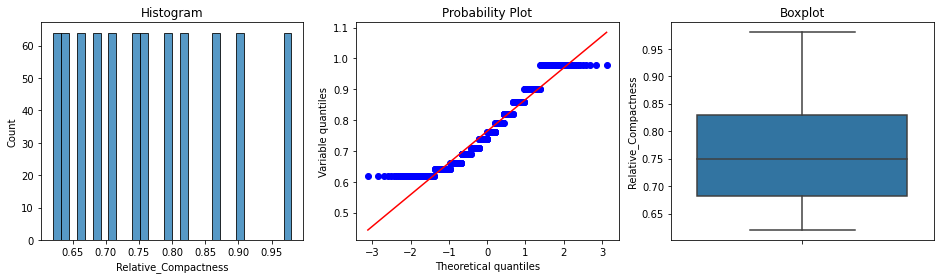

Skewnessis of Relative_Compactness is 0.50


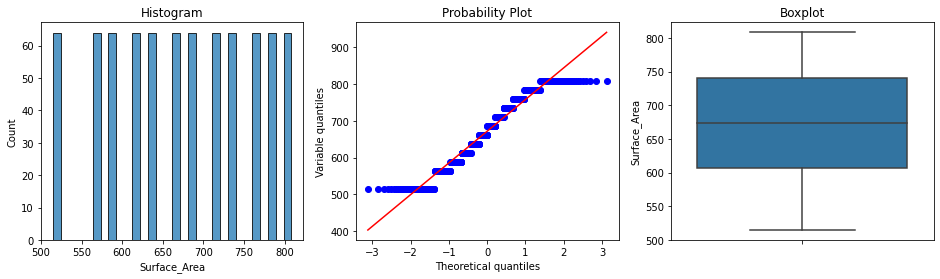

Skewnessis of Surface_Area is -0.13


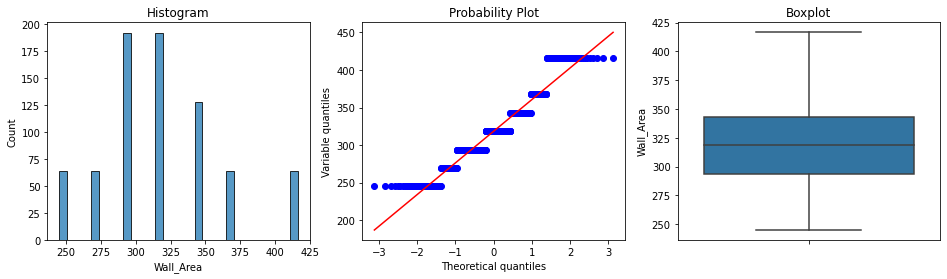

Skewnessis of Wall_Area is 0.53


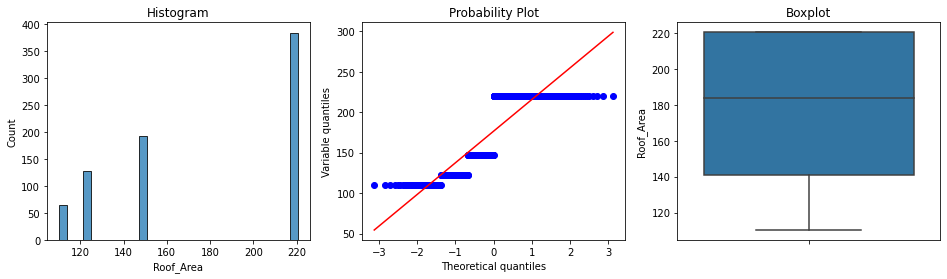

Skewnessis of Roof_Area is -0.16


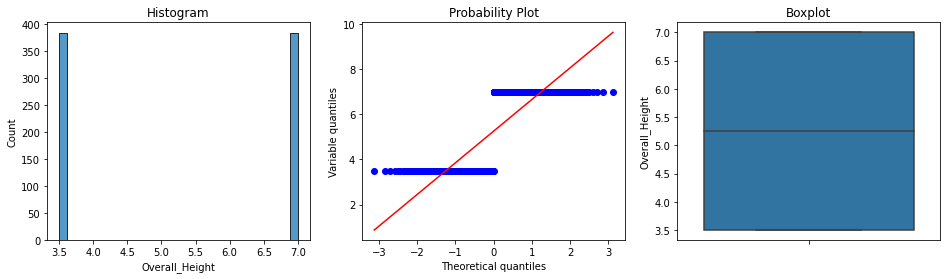

Skewnessis of Overall_Height is 0.00


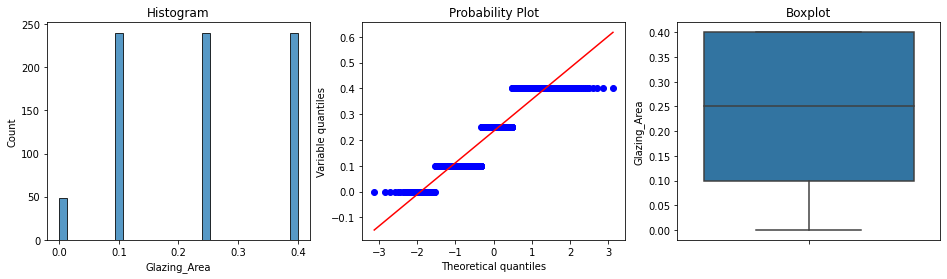

Skewnessis of Glazing_Area is -0.06


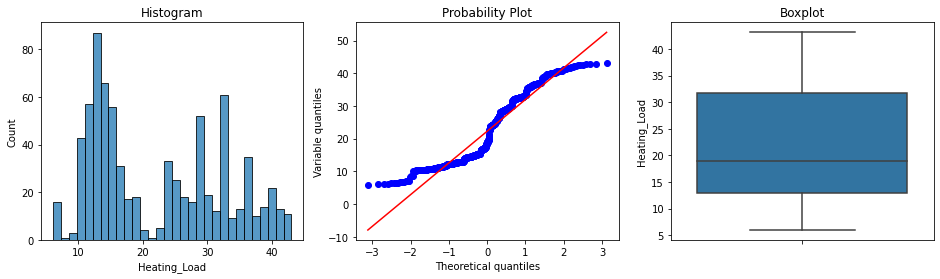

Skewnessis of Heating_Load is 0.36


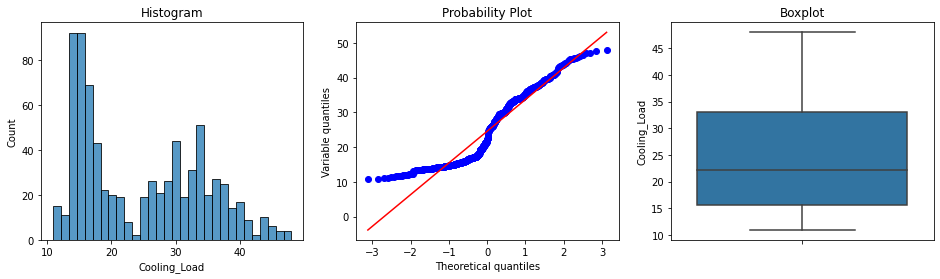

Skewnessis of Cooling_Load is 0.40


In [12]:
# plotting numerical variables
for variable in num_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    print("Skewnessis of", variable, "is {:.2f}".format(skewness))

Discussion: No outliers. Variance of Overall_Height and Glazing_Area is small.

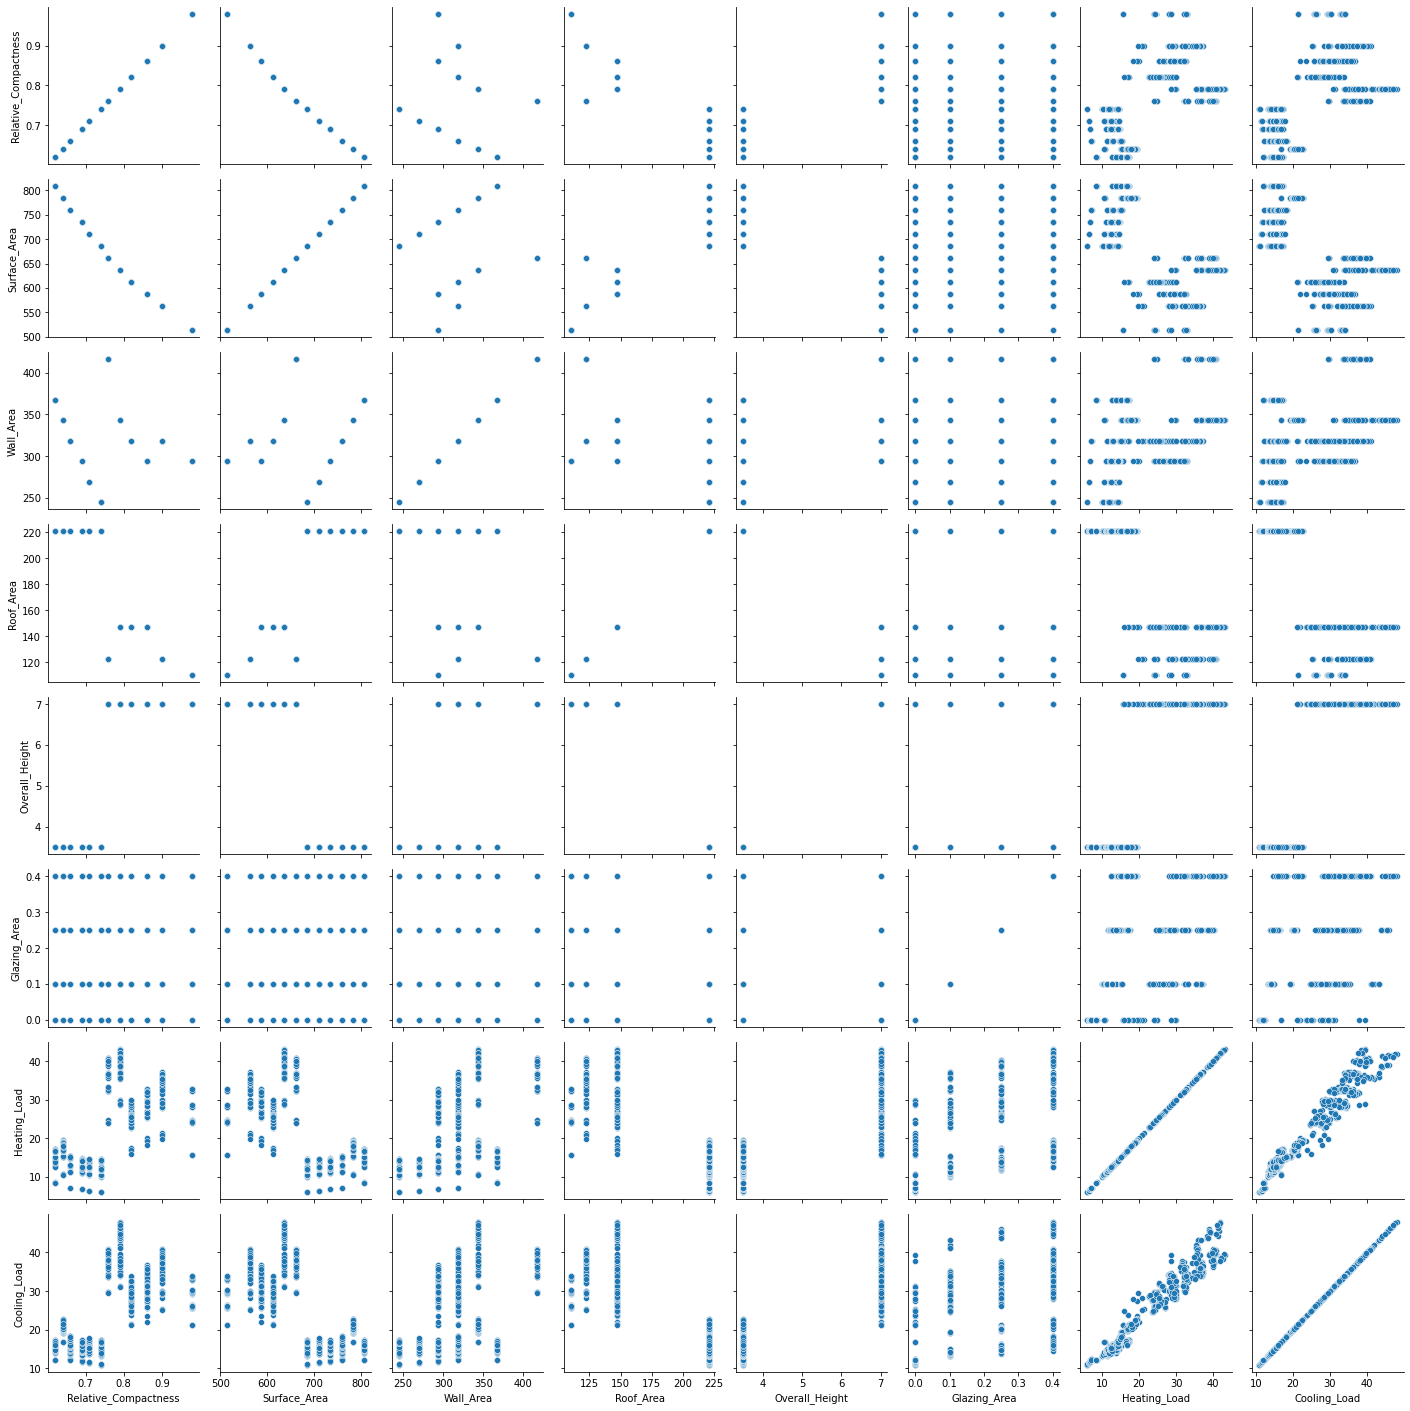

In [13]:
# plotting scatterplots with pairs of numerical variables
# w/o outliers in 'Tensile Strength (MPa)'
g = sns.PairGrid(df[num_vars])
g.map(sns.scatterplot)

In [14]:
# moving targets from num_vars list to targets list
targets = num_vars[-2:]
num_vars = num_vars[:-2]

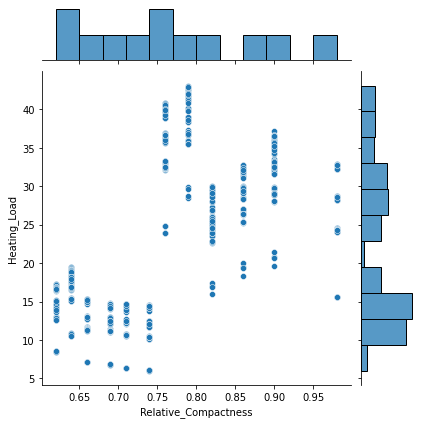

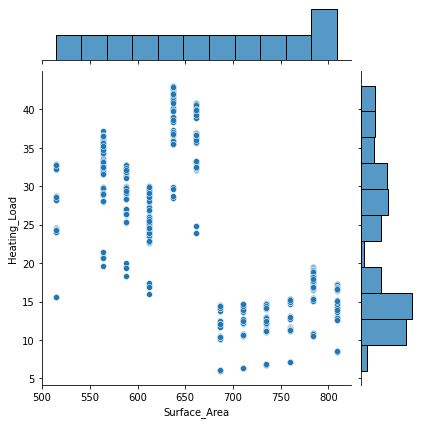

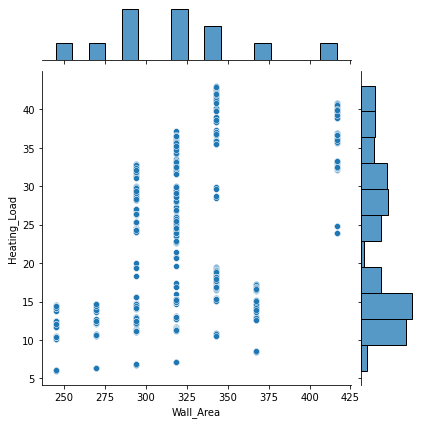

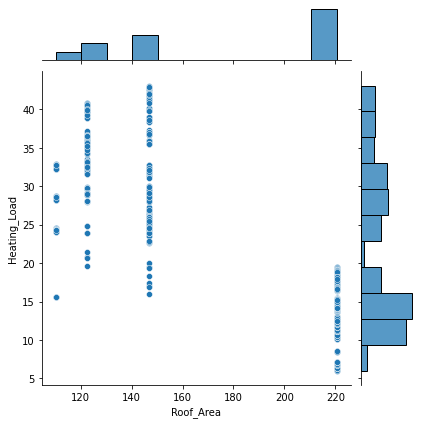

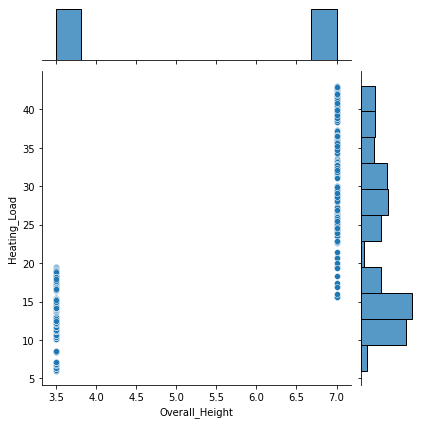

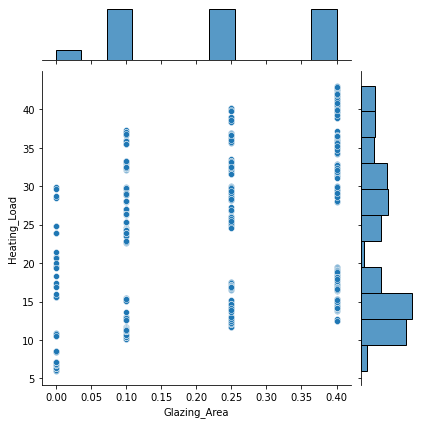

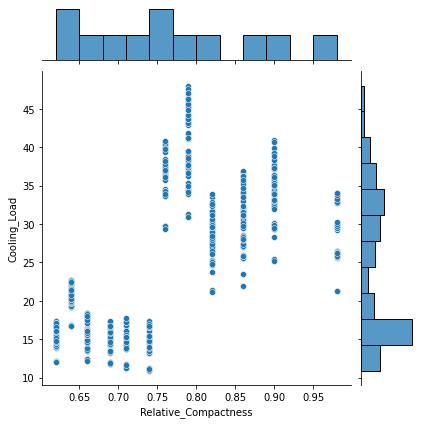

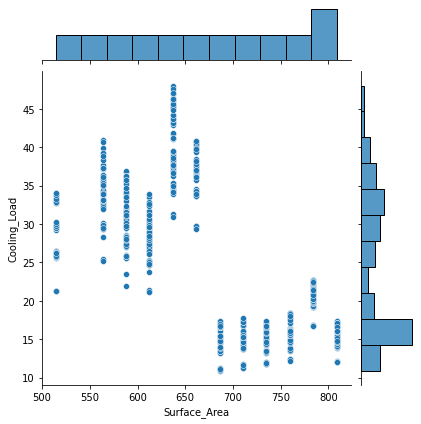

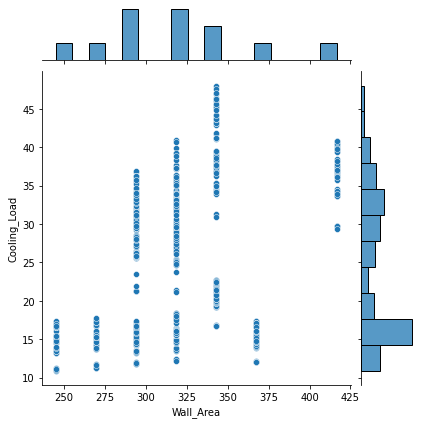

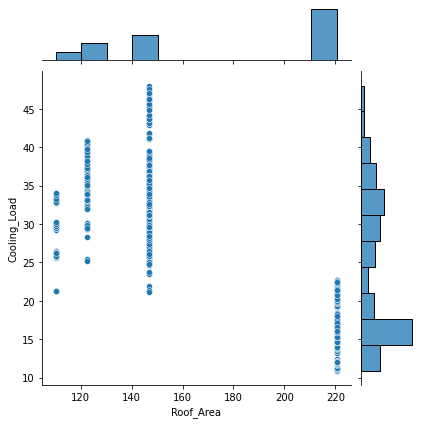

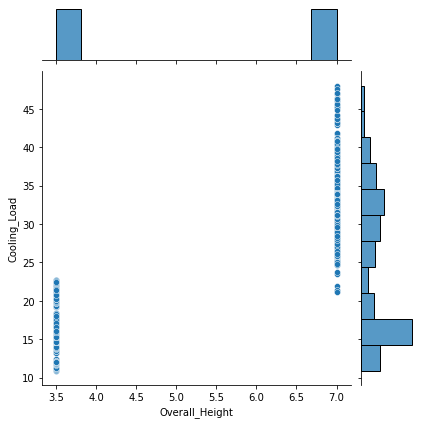

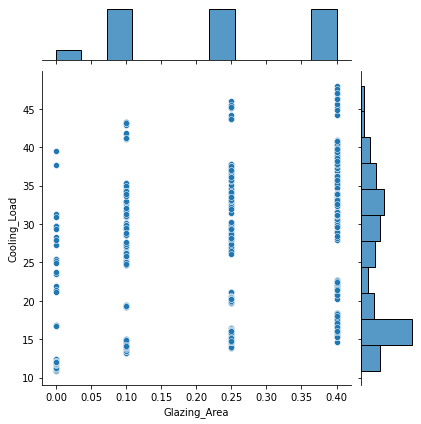

In [15]:
# closer look at influence of numerical variables on the targers
for target in targets:
    for var in num_vars:
            sns.jointplot(data=df, x=var, y=target)

Discussion: all the numerical variables seems to be correlated with the targets.

<h3>Categorical variables</h3>

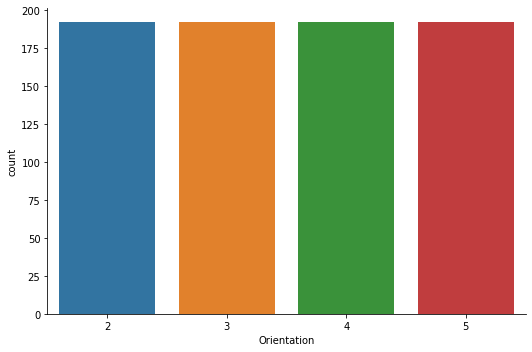

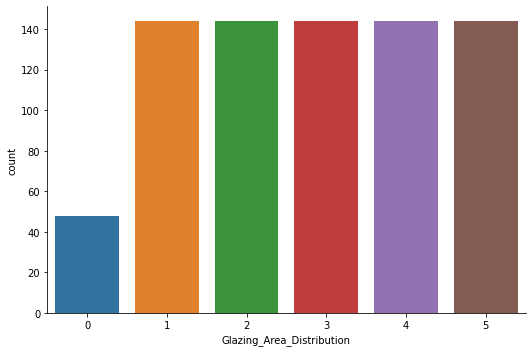

In [16]:
# plotting categorical variables
for var in cat_vars:
    ax = sns.catplot(var, data=df, kind='count', aspect=1.5)

In [17]:
# closer look at 'Orientation'
df_orient = df['Orientation'].value_counts(dropna=False).to_frame()
for code in df_orient.index:
    df_orient.loc[[code], ['Heating_Load']] = \
        df['Heating_Load'][df['Orientation'] == code].mean()
    df_orient.loc[[code], ['Cooling_Load']] = \
        df['Cooling_Load'][df['Orientation'] == code].mean()
df_orient

,Orientation,Heating_Load,Cooling_Load
2,192,22.312865,24.604531
3,192,22.380677,24.312552
4,192,22.259875,24.480312
5,192,22.275365,24.953646


In [18]:
# closer look at 'Orientation'
df_orient = \
    df['Glazing_Area_Distribution'].value_counts(dropna=False).to_frame()
for code in df_orient.index:
    df_orient.loc[[code], ['Heating_Load']] = \
        df['Heating_Load'][df['Glazing_Area_Distribution'] == code].mean()
    df_orient.loc[[code], ['Cooling_Load']] = \
        df['Cooling_Load'][df['Glazing_Area_Distribution'] == code].mean()
df_orient

,Glazing_Area_Distribution,Heating_Load,Cooling_Load
1,144,23.026111,25.179514
2,144,22.934444,24.996875
3,144,22.681458,24.659444
4,144,22.886667,25.015139
5,144,22.680903,24.715000
0,48,14.286375,19.706250


Discussion: 'Glazing_Area_Distribution' has prominent influence on the targets and 'Orientation' hasn't.

<h2>2. Feature Engineering</h2>

One hot encoding categorical variables

In [19]:
# casting categorical variables as string
df[cat_vars] = df[cat_vars].astype(str)

In [20]:
# defining X and Y
model_vars = num_vars + cat_vars
X = df[model_vars]

In [21]:
# one hot encoding 'Orientation' and 'Glazing_Area_Distribution'
ohe = OneHotEncoder()
X_object = X.select_dtypes('object')
ohe.fit(X_object)
codes = ohe.transform(X_object).toarray()
feature_names = \
    ohe.get_feature_names(['Orientation', 'Glazing_Area_Distribution'])
X = pd.concat([df.select_dtypes(exclude='object'), 
               pd.DataFrame(codes, columns=feature_names).astype(int)], axis=1)

<h2>3. Feature Selection</h2>

Using all the features.

<h2>4. Regression</h2>

<b>'Heating_Load'</b>

In [22]:
# defining X and y
y = df['Heating_Load'].values

In [23]:
# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# defining a regressor
regressor_xg = XGBRegressor(max_depth=2, max_leaves=2, random_state=42)

# applying k-fold cross validation
rmse = cross_val_score(estimator=regressor_xg,
                       X=X_train, y=y_train, cv=10)
print()
print('Cross validation')
print("rmse: {:.2f} %".format(rmse.mean()*100))
print("Standard Deviation: {:.2f} %".format(rmse.std()*100))

# fitting the regressor and predicting y_test
regressor_xg.fit(X_train, y_train)
y_pred = regressor_xg.predict(X_test)

# evaluation
y_train_hat = regressor_xg.predict(X_train)
print()
print('Evaluation')
print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.4f}")
print(f"RMSE test : {mean_squared_error(y_test, y_pred):.4f}")
print(f"r2 train  : {r2_score(y_train, y_train_hat):.4f}")
print(f"r2 test   : {r2_score(y_test, y_pred):.4f}")

[00:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<b>'Cooling_Load'</b>

In [24]:
# defining X and y
y = df['Cooling_Load'].values

In [25]:
# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# defining a regressor
regressor_xg = XGBRegressor(max_depth=2, max_leaves=2, random_state=42)

# applying k-fold cross validation
rmse = cross_val_score(estimator = regressor_xg,
                       X=X_train, y=y_train, cv=10)
print()
print('Cross validation')
print("rmse: {:.2f} %".format(rmse.mean()*100))
print("Standard Deviation: {:.2f} %".format(rmse.std()*100))

# fitting the regressor and predicting y_test
regressor_xg.fit(X_train, y_train)
y_pred = regressor_xg.predict(X_test)

# evaluation
y_train_hat = regressor_xg.predict(X_train)
print()
print('Evaluation')
print(f"RMSE train: {mean_squared_error(y_train, y_train_hat):.4f}")
print(f"RMSE test : {mean_squared_error(y_test, y_pred):.4f}")
print(f"r2 train  : {r2_score(y_train, y_train_hat):.4f}")
print(f"r2 test   : {r2_score(y_test, y_pred):.4f}")

[00:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<h2>5. Discussion</h2>

Both, heating and cooling load, predicted by XGBoost regressor with R square score of 0.99. RMSE of heating load is 0.011, cooling - 0.025 kWh/m².
<table>
  <tr>
    <th>Evaluation Criteria</th>
    <th>Heating Load</th>
    <th>Cooling Load</th>
  </tr>
  <tr>
    <th>RMSE train</th>
    <th>0.0074</th>
    <th>0.0107</th>
  </tr>
  <tr>
    <th>RMSE test</th>
    <th>0.0124</th>
    <th>0.0252</th>
  </tr>
  <tr>
    <th>R2 train</th>
    <th>0.99</th>
    <th>0.99</th>
  </tr>
  <tr>
    <th>R2 test</th>
    <th>0.99</th>
    <th>0.99</th>
  </tr>
</table>